<a href="https://colab.research.google.com/github/cemalatas/git-intro-ica-25/blob/main/germansentiment_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install germansentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!pip install germansentiment pandas numpy scikit-learn matplotlib seaborn openpyxl tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [3]:
import pandas as pd
import numpy as np
from germansentiment import SentimentModel
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)
print("✓ Libraries imported successfully")


✓ Libraries imported successfully


In [4]:
def load_and_explore_data(file_path):
    """Load data and perform initial exploration."""
    print("Loading data...")
    df = pd.read_excel(file_path)

    # Basic information
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {df.columns.tolist()[:10]}... (showing first 10)")

    # Filter rows with comments
    df_with_comments = df[df['user_comment'].notna() & (df['user_comment'].str.strip() != '')].copy()

    print(f"\nRows with comments: {len(df_with_comments)} ({len(df_with_comments)/len(df)*100:.1f}%)")

    return df, df_with_comments

# Load the data
df_full, df_comments = load_and_explore_data('data_study2.xlsx')


Loading data...
Dataset shape: (1181, 436)

Columns: ['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'DL01', 'IV01_01', 'IV01_02', 'IV01_03']... (showing first 10)

Rows with comments: 1090 (92.3%)


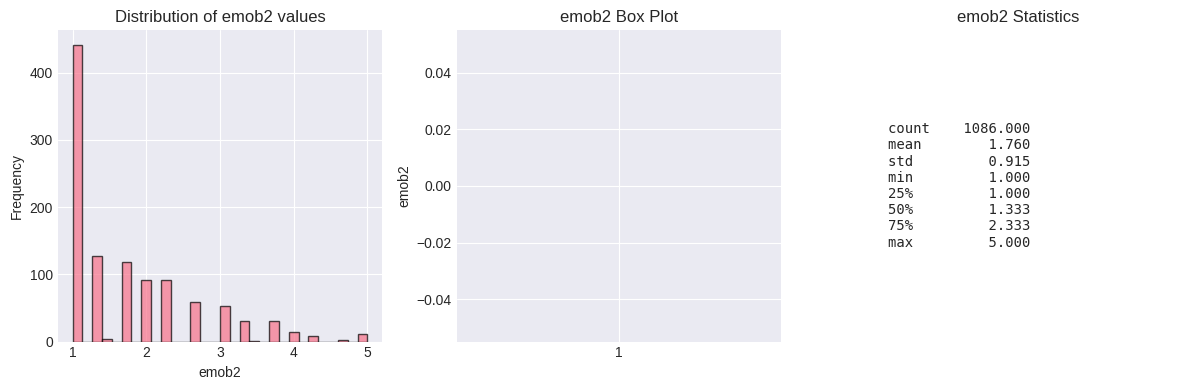


emob2 value distribution:
emob2
1.000000    441
1.333333    127
1.500000      4
1.666667    119
2.000000     92
2.333333     92
2.666667     59
3.000000     53
3.333333     30
3.500000      1
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df_comments['emob2'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('emob2')
plt.ylabel('Frequency')
plt.title('Distribution of emob2 values')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(df_comments['emob2'], vert=True)
plt.ylabel('emob2')
plt.title('emob2 Box Plot')

# Summary statistics
plt.subplot(1, 3, 3)
stats_text = df_comments['emob2'].describe().round(3).to_string()
plt.text(0.1, 0.5, stats_text, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='center', fontfamily='monospace')
plt.axis('off')
plt.title('emob2 Statistics')

plt.tight_layout()
plt.show()

# Print value counts
print("\nemob2 value distribution:")
print(df_comments['emob2'].value_counts().sort_index().head(10))

In [7]:
print("Sample comments with their emob2 values:\n")
sample_df = df_comments[['user_comment', 'emob2']].sample(5, random_state=42)
for idx, row in sample_df.iterrows():
    print(f"emob2: {row['emob2']:.2f}")
    print(f"Comment: {row['user_comment'][:150]}...")
    print("-" * 80)


Sample comments with their emob2 values:

emob2: 1.00
Comment: Sicher sollte man über Flugreisen im Allgemeinen nachdenken, was es für Umweltschäden verursacht, aber alles zu verbieten kann auch nicht die richtige...
--------------------------------------------------------------------------------
emob2: 1.00
Comment: Ihr habt bestimmt recht und ich hoffe, die zahlen sind gut recherchiert...
--------------------------------------------------------------------------------
emob2: 1.33
Comment: Nach Ägypten aknn man schlecht mit dem Zug fahren...
--------------------------------------------------------------------------------
emob2: 1.00
Comment: Es ist wichtig das den Menschen dies regelmäßig vor Augen geführt wird, wie viel CO2 Flugzeuge ausstoßen. So kann sich immer wieder aufs neue Entschie...
--------------------------------------------------------------------------------
emob2: 2.33
Comment: Der Zug verbraucht ein zehntel des CO2 wie das Flugzeug, dann viel Spaß auf dem Weg mit der B

In [11]:
# Cell 6 Alternative: Using transformers library directly for more control
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

print("Loading German BERT model directly...")
model_name = "oliverguhr/german-sentiment-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Set to evaluation mode
model.eval()

def extract_sentiment_features_transformers(texts, tokenizer, model, batch_size=16):
    """Extract sentiment features using transformers directly."""
    print(f"\nExtracting sentiment features for {len(texts)} comments...")

    all_features = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Define label mapping based on the model
    id2label = {0: 'positive', 1: 'negative', 2: 'neutral'}

    with torch.no_grad():
        for i in tqdm(range(0, len(texts), batch_size)):
            batch_texts = texts[i:i+batch_size]

            # Tokenize
            inputs = tokenizer(batch_texts,
                             padding=True,
                             truncation=True,
                             max_length=512,
                             return_tensors="pt").to(device)

            # Get model outputs
            outputs = model(**inputs)

            # Get probabilities
            probs = F.softmax(outputs.logits, dim=-1).cpu().numpy()
            predictions = outputs.logits.argmax(dim=-1).cpu().numpy()

            # Create features for each text
            for j in range(len(batch_texts)):
                pred_label = id2label[predictions[j]]

                features = {
                    'predicted_sentiment': pred_label,
                    'prob_positive': probs[j][0],
                    'prob_negative': probs[j][1],
                    'prob_neutral': probs[j][2] if probs.shape[1] > 2 else 0,
                    'confidence': np.max(probs[j]),
                    'sentiment_entropy': -np.sum(probs[j] * np.log(probs[j] + 1e-10)),
                    'is_positive': 1 if pred_label == 'positive' else 0,
                    'is_negative': 1 if pred_label == 'negative' else 0,
                    'is_neutral': 1 if pred_label == 'neutral' else 0,
                }
                all_features.append(features)

    return pd.DataFrame(all_features)

# Extract sentiment features
texts = df_comments['user_comment'].tolist()

# Use transformers approach
try:
    sentiment_features = extract_sentiment_features_transformers(texts, tokenizer, model)
    print("\n✓ Using transformers library for sentiment extraction")
except Exception as e:
    print(f"Transformers approach failed: {e}")
    print("Falling back to simple germansentiment...")
    sentiment_features = extract_sentiment_features(texts, sentiment_model)

print(f"\n✓ Sentiment features extracted: {sentiment_features.shape}")
print(f"Columns: {sentiment_features.columns.tolist()}")

# Show sample features
print("\nSample features:")
print(sentiment_features.head())

Loading German BERT model directly...

Extracting sentiment features for 1090 comments...


100%|██████████| 69/69 [00:01<00:00, 36.26it/s]


✓ Using transformers library for sentiment extraction

✓ Sentiment features extracted: (1090, 9)
Columns: ['predicted_sentiment', 'prob_positive', 'prob_negative', 'prob_neutral', 'confidence', 'sentiment_entropy', 'is_positive', 'is_negative', 'is_neutral']

Sample features:
  predicted_sentiment  prob_positive  prob_negative  prob_neutral  confidence  \
0             neutral       0.027276       0.160645      0.812079    0.812079   
1             neutral       0.000011       0.000022      0.999967    0.999967   
2            negative       0.036749       0.921845      0.041406    0.921845   
3             neutral       0.006513       0.026506      0.966981    0.966981   
4            negative       0.013268       0.974051      0.012681    0.974051   

   sentiment_entropy  is_positive  is_negative  is_neutral  
0           0.561032            0            0           1  
1           0.000389            0            0           1  
2           0.328274            0            1      

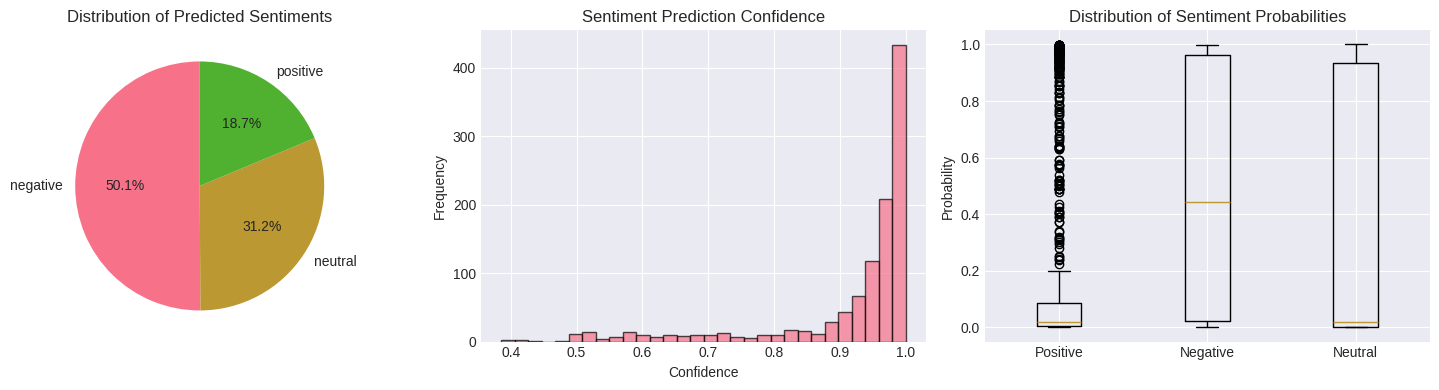

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Sentiment class distribution
axes[0].pie(sentiment_features['predicted_sentiment'].value_counts().values,
            labels=sentiment_features['predicted_sentiment'].value_counts().index,
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Predicted Sentiments')

# Confidence distribution
axes[1].hist(sentiment_features['confidence'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Confidence')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Sentiment Prediction Confidence')

# Sentiment probabilities
sentiment_probs = sentiment_features[['prob_positive', 'prob_negative', 'prob_neutral']]
axes[2].boxplot([sentiment_probs['prob_positive'],
                 sentiment_probs['prob_negative'],
                 sentiment_probs['prob_neutral']])
axes[2].set_xticklabels(['Positive', 'Negative', 'Neutral'])
axes[2].set_ylabel('Probability')
axes[2].set_title('Distribution of Sentiment Probabilities')

plt.tight_layout()
plt.show()


In [14]:
# Cell 8: Create text-based features (FIXED)
def create_text_features(texts):
    """Create comprehensive text-based features."""
    print("Creating text features...")

    features = []
    for text in tqdm(texts):
        # Basic statistics
        words = text.split()
        sentences = [s for s in text.split('.') if s.strip()]

        # Emotional indicators
        emotional_words = ['schlimm', 'traurig', 'wütend', 'angst', 'sorge', 'freude',
                          'glücklich', 'hoffnung', 'verzweifelt', 'ärger']
        emotional_count = sum(1 for word in words if word.lower() in emotional_words)

        feat = {
            # Length features
            'char_count': len(text),
            'word_count': len(words),
            'sentence_count': len(sentences),
            'avg_word_length': np.mean([len(w) for w in words]) if words else 0,
            'avg_sentence_length': np.mean([len(s.split()) for s in sentences]) if sentences else 0,

            # Punctuation features
            'exclamation_marks': text.count('!'),
            'question_marks': text.count('?'),
            'dots_count': text.count('.'),
            'comma_count': text.count(','),
            'ellipsis_count': text.count('...'),

            # Style features
            'uppercase_words': sum(1 for w in words if w.isupper() and len(w) > 1),
            'capitalized_ratio': sum(1 for w in words if len(w) > 0 and w[0].isupper()) / max(len(words), 1),
            'all_caps_ratio': sum(1 for c in text if c.isupper()) / max(len(text), 1),

            # Content features
            'emoji_count': sum(1 for c in text if ord(c) > 127),
            'digit_count': sum(1 for c in text if c.isdigit()),
            'special_char_ratio': sum(1 for c in text if not c.isalnum() and not c.isspace()) / max(len(text), 1),
            'emotional_words': emotional_count,
            'emotional_density': emotional_count / max(len(words), 1),

            # Complexity
            'unique_words': len(set(w.lower() for w in words)),
            'lexical_diversity': len(set(w.lower() for w in words)) / max(len(words), 1)
        }
        features.append(feat)

    return pd.DataFrame(features)

# Create text features
text_features = create_text_features(texts)
print(f"\n✓ Text features created: {text_features.shape}")
print(f"Features: {text_features.columns.tolist()}")

Creating text features...


100%|██████████| 1090/1090 [00:00<00:00, 15647.71it/s]


✓ Text features created: (1090, 20)
Features: ['char_count', 'word_count', 'sentence_count', 'avg_word_length', 'avg_sentence_length', 'exclamation_marks', 'question_marks', 'dots_count', 'comma_count', 'ellipsis_count', 'uppercase_words', 'capitalized_ratio', 'all_caps_ratio', 'emoji_count', 'digit_count', 'special_char_ratio', 'emotional_words', 'emotional_density', 'unique_words', 'lexical_diversity']


In [15]:
X = pd.concat([sentiment_features, text_features], axis=1)
y = df_comments['emob2'].values

print(f"Final feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

# Check for any missing values
print(f"\nMissing values: {X.isnull().sum().sum()}")

Final feature matrix shape: (1090, 29)
Target variable shape: (1090,)

Missing values: 0


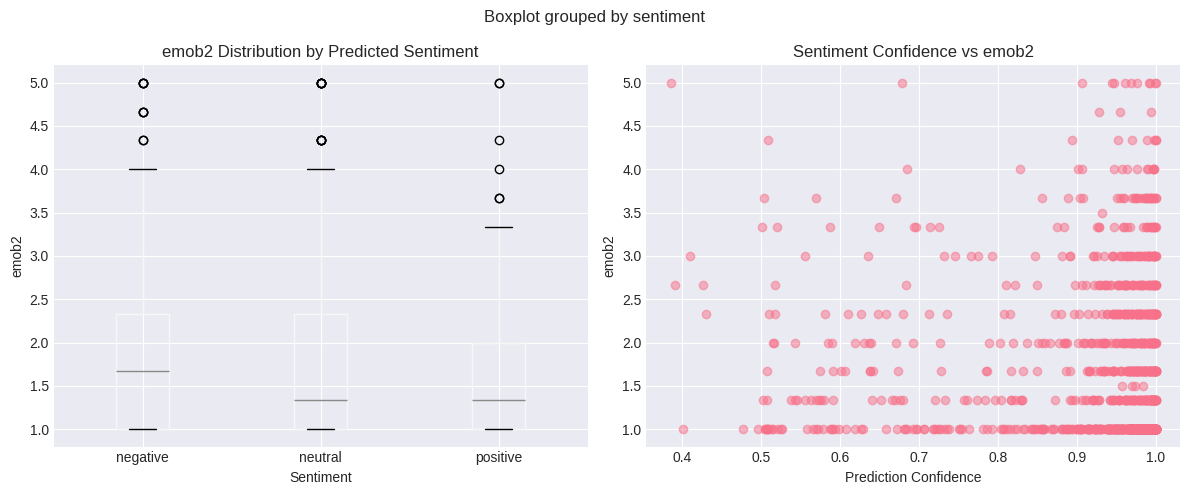


Average emob2 by sentiment:
           count   mean    std
sentiment                     
negative     544  1.823  0.938
neutral      340  1.748  0.931
positive     202  1.612  0.808


In [16]:
analysis_df = pd.DataFrame({
    'emob2': y,
    'sentiment': sentiment_features['predicted_sentiment'],
    'confidence': sentiment_features['confidence']
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box plot of emob2 by sentiment
analysis_df.boxplot(column='emob2', by='sentiment', ax=axes[0])
axes[0].set_title('emob2 Distribution by Predicted Sentiment')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('emob2')

# Scatter plot: confidence vs emob2
axes[1].scatter(analysis_df['confidence'], analysis_df['emob2'], alpha=0.5)
axes[1].set_xlabel('Prediction Confidence')
axes[1].set_ylabel('emob2')
axes[1].set_title('Sentiment Confidence vs emob2')

plt.tight_layout()
plt.show()

# Statistical summary
print("\nAverage emob2 by sentiment:")
print(analysis_df.groupby('sentiment')['emob2'].agg(['count', 'mean', 'std']).round(3))


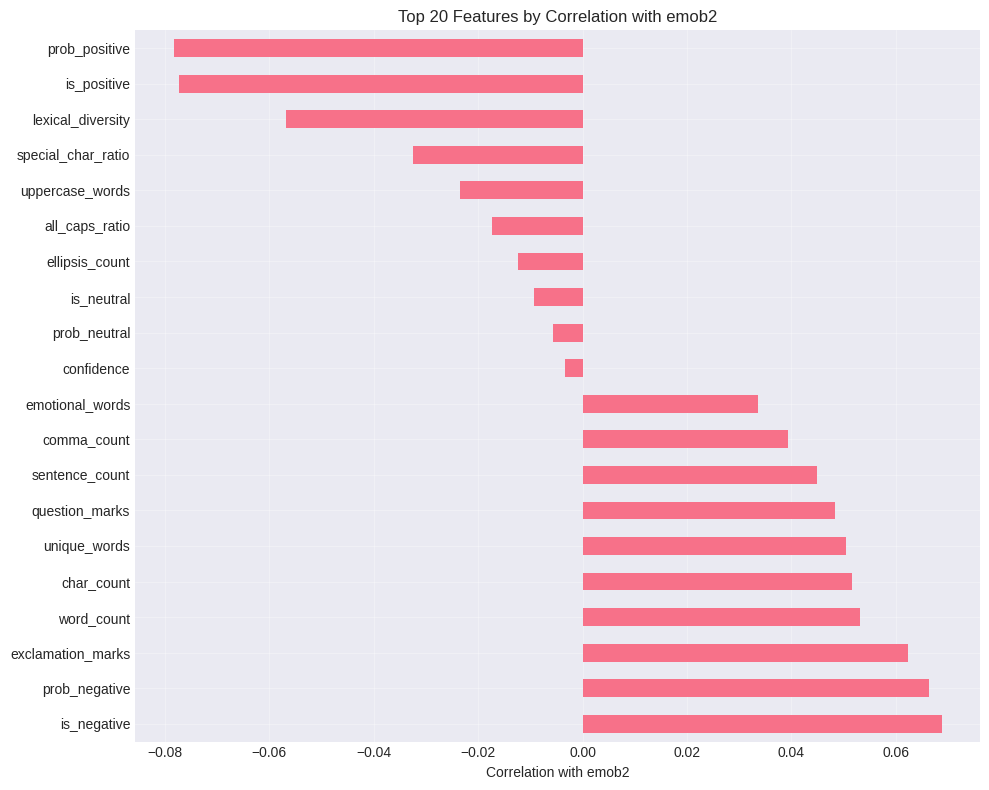

Top positive correlations:
is_negative          0.069
prob_negative        0.066
exclamation_marks    0.062
word_count           0.053
char_count           0.052
unique_words         0.050
question_marks       0.048
sentence_count       0.045
comma_count          0.039
emotional_words      0.034
dtype: float64

Top negative correlations:
confidence           -0.003
prob_neutral         -0.006
is_neutral           -0.009
ellipsis_count       -0.012
all_caps_ratio       -0.017
uppercase_words      -0.023
special_char_ratio   -0.032
lexical_diversity    -0.057
is_positive          -0.077
prob_positive        -0.078
dtype: float64


In [17]:
correlations = X.select_dtypes(include=[np.number]).corrwith(pd.Series(y)).sort_values(ascending=False)

# Plot top correlations
plt.figure(figsize=(10, 8))
top_features = pd.concat([correlations.head(10), correlations.tail(10)])
top_features.plot(kind='barh')
plt.xlabel('Correlation with emob2')
plt.title('Top 20 Features by Correlation with emob2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Top positive correlations:")
print(correlations.head(10).round(3))
print("\nTop negative correlations:")
print(correlations.tail(10).round(3))

In [22]:
# Cell 12: Prepare data for modeling (FIXED - for numpy arrays)
# First, check for NaN values
print(f"NaN values in y before cleaning: {np.isnan(y).sum()}")
print(f"Total samples before cleaning: {len(y)}")

# Remove rows with NaN in target variable
mask = ~np.isnan(y)
X_clean = X[mask]
y_clean = y[mask]

print(f"Total samples after cleaning: {len(y_clean)}")

# Encode categorical variables
le = LabelEncoder()
X_clean['sentiment_encoded'] = le.fit_transform(X_clean['predicted_sentiment'])

# Select features for modeling
feature_cols = [col for col in X_clean.columns if col != 'predicted_sentiment']
X_model = X_clean[feature_cols]

# Split data - using simple random split
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_clean, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# Check target distribution
print(f"\nTarget distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for val, count in zip(unique[:10], counts[:10]):  # Show first 10 values
    print(f"  {val:.2f}: {count}")

NaN values in y before cleaning: 4
Total samples before cleaning: 1090
Total samples after cleaning: 1086

Training set: (868, 29)
Test set: (218, 29)

Target distribution in training set:
  1.00: 364
  1.33: 105
  1.50: 3
  1.67: 89
  2.00: 70
  2.33: 71
  2.67: 49
  3.00: 40
  3.33: 20
  3.50: 1


In [23]:
def train_models(X_train, X_test, y_train, y_test):
    """Train multiple regression models and return results."""

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Random Forest': RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ),
        'SVR': SVR(kernel='rbf', C=1.0, gamma='scale')
    }

    results = {}

    print("Training models...\n")
    for name, model in models.items():
        print(f"{name}:")

        # Cross-validation
        cv_scores = cross_val_score(
            model, X_train, y_train,
            cv=5, scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        cv_rmse = np.sqrt(-cv_scores)

        # Train model
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Calculate metrics
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        results[name] = {
            'model': model,
            'cv_rmse': cv_rmse.mean(),
            'cv_rmse_std': cv_rmse.std(),
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'test_mae': test_mae,
            'y_pred_test': y_pred_test
        }

        print(f"  CV RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")
        print(f"  Train R²: {train_r2:.4f}, RMSE: {train_rmse:.4f}")
        print(f"  Test R²:  {test_r2:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}\n")

    return results

# Train all models
results = train_models(X_train_scaled, X_test_scaled, y_train, y_test)


Training models...

Linear Regression:
  CV RMSE: 0.9409 ± 0.0551
  Train R²: 0.0412, RMSE: 0.9041
  Test R²:  -0.0707, RMSE: 0.9086, MAE: 0.7235

Ridge Regression:
  CV RMSE: 0.9389 ± 0.0548
  Train R²: 0.0412, RMSE: 0.9042
  Test R²:  -0.0705, RMSE: 0.9086, MAE: 0.7236

Random Forest:
  CV RMSE: 0.9536 ± 0.0752
  Train R²: 0.5226, RMSE: 0.6380
  Test R²:  -0.0993, RMSE: 0.9207, MAE: 0.7365

Gradient Boosting:
  CV RMSE: 1.0057 ± 0.0844
  Train R²: 0.7778, RMSE: 0.4353
  Test R²:  -0.2186, RMSE: 0.9694, MAE: 0.7680

SVR:
  CV RMSE: 0.9839 ± 0.0745
  Train R²: 0.0705, RMSE: 0.8902
  Test R²:  -0.2953, RMSE: 0.9995, MAE: 0.7445



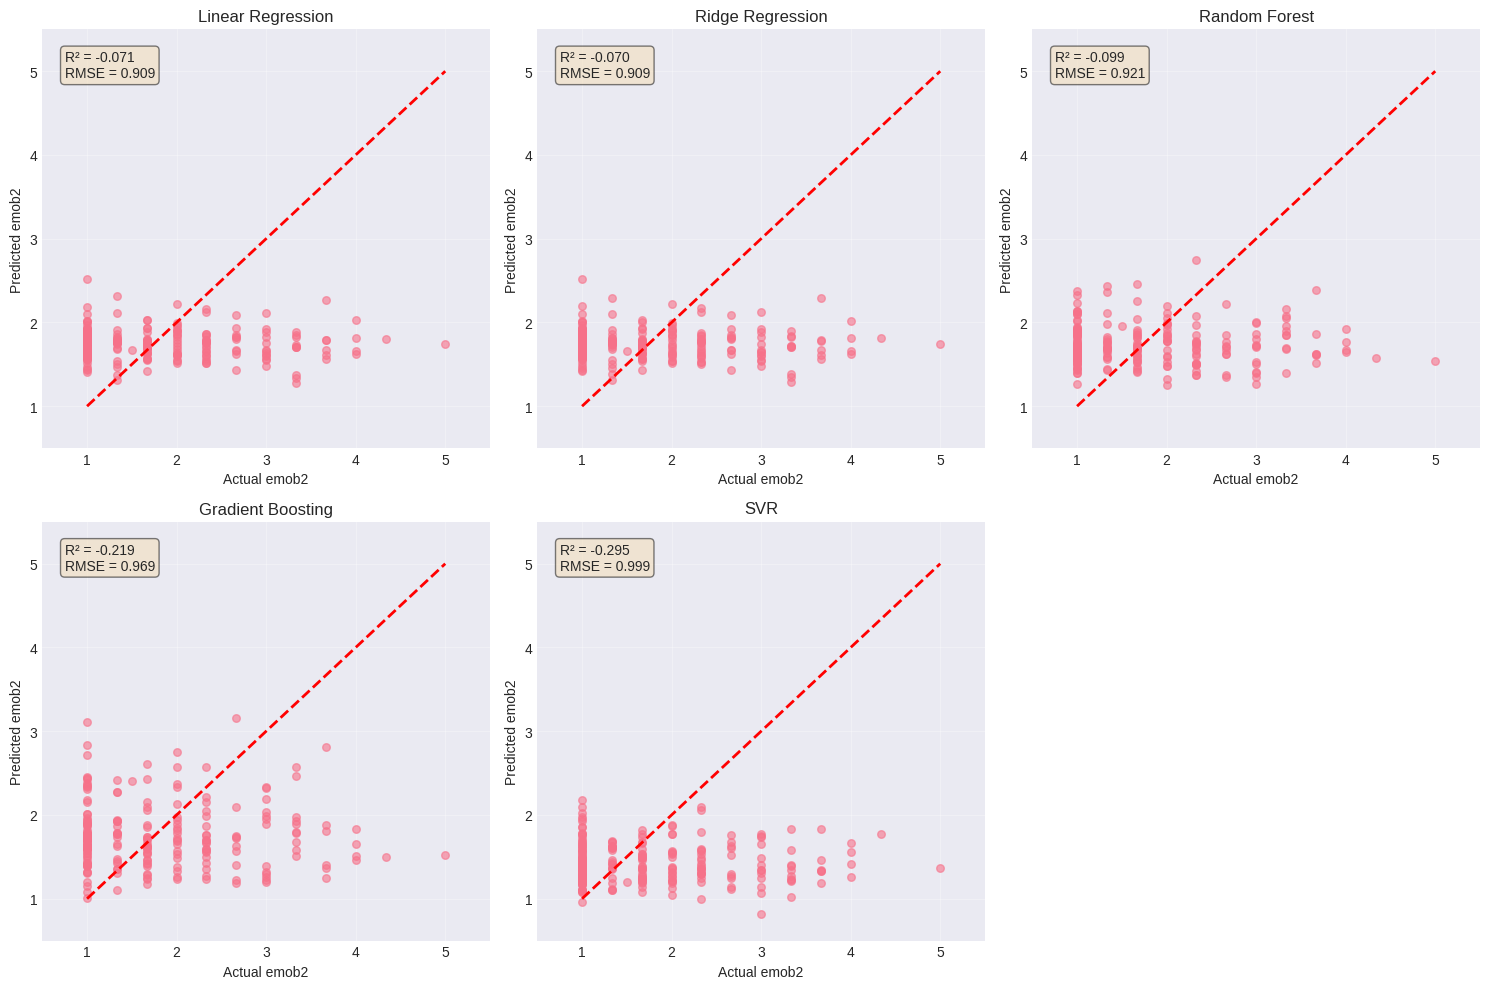

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (name, res) in enumerate(results.items()):
    ax = axes[idx]

    # Scatter plot
    ax.scatter(y_test, res['y_pred_test'], alpha=0.6, s=30)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
            'r--', lw=2, label='Perfect prediction')

    # Add metrics to plot
    textstr = f'R² = {res["test_r2"]:.3f}\nRMSE = {res["test_rmse"]:.3f}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax.set_xlabel('Actual emob2')
    ax.set_ylabel('Predicted emob2')
    ax.set_title(name)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0.5, 5.5)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()




Model Performance Comparison:
               Model  CV RMSE  Test R²  Test RMSE  Test MAE
1   Ridge Regression   0.9389  -0.0705     0.9086    0.7236
0  Linear Regression   0.9409  -0.0707     0.9086    0.7235
2      Random Forest   0.9536  -0.0993     0.9207    0.7365
3  Gradient Boosting   1.0057  -0.2186     0.9694    0.7680
4                SVR   0.9839  -0.2953     0.9995    0.7445


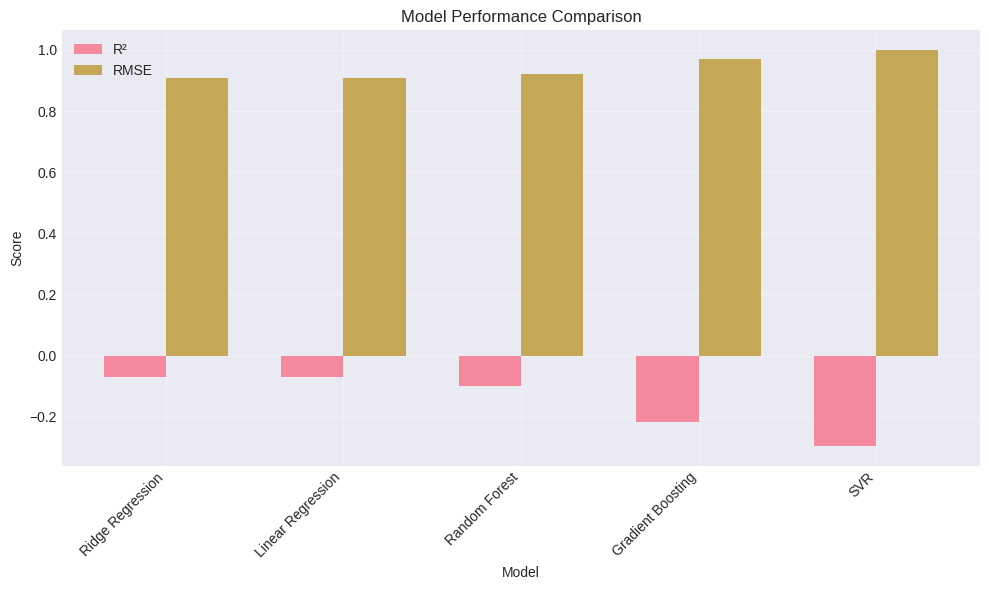

In [27]:

# Cell 15: Model comparison
# Create comparison dataframe
comparison_data = []
for name, res in results.items():
    comparison_data.append({
        'Model': name,
        'CV RMSE': res['cv_rmse'],
        'Test R²': res['test_r2'],
        'Test RMSE': res['test_rmse'],
        'Test MAE': res['test_mae']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test R²', ascending=False)

# Display results
print("Model Performance Comparison:")
print(comparison_df.round(4))

# Bar plot comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(comparison_df))
width = 0.35

ax.bar([i - width/2 for i in x], comparison_df['Test R²'], width, label='R²', alpha=0.8)
ax.bar([i + width/2 for i in x], comparison_df['Test RMSE'], width, label='RMSE', alpha=0.8)

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


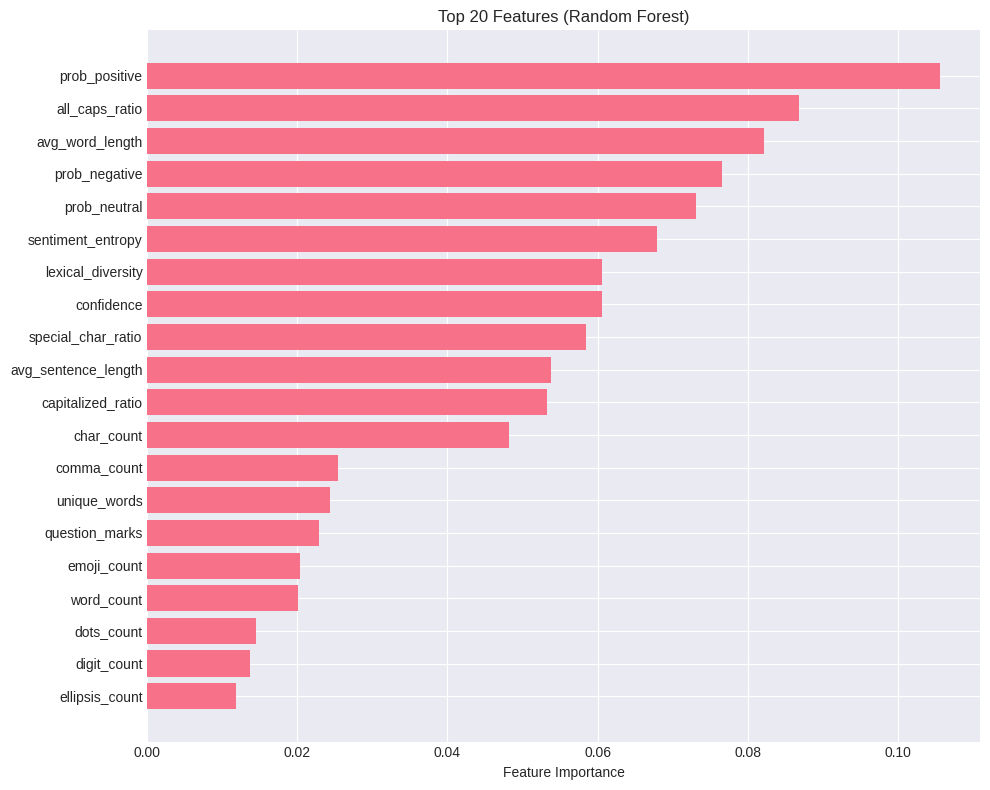

Top 10 most important features:
                feature  importance
0         prob_positive    0.105699
20       all_caps_ratio    0.086866
11      avg_word_length    0.082207
1         prob_negative    0.076639
2          prob_neutral    0.073170
4     sentiment_entropy    0.067876
27    lexical_diversity    0.060661
3            confidence    0.060577
23   special_char_ratio    0.058491
12  avg_sentence_length    0.053867


In [28]:
tree_models = ['Random Forest', 'Gradient Boosting']
best_tree_model = max(tree_models, key=lambda x: results[x]['test_r2'])
best_model = results[best_tree_model]['model']

# Get feature importances
importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(20)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title(f'Top 20 Features ({best_tree_model})')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(feature_importance_df.head(10))


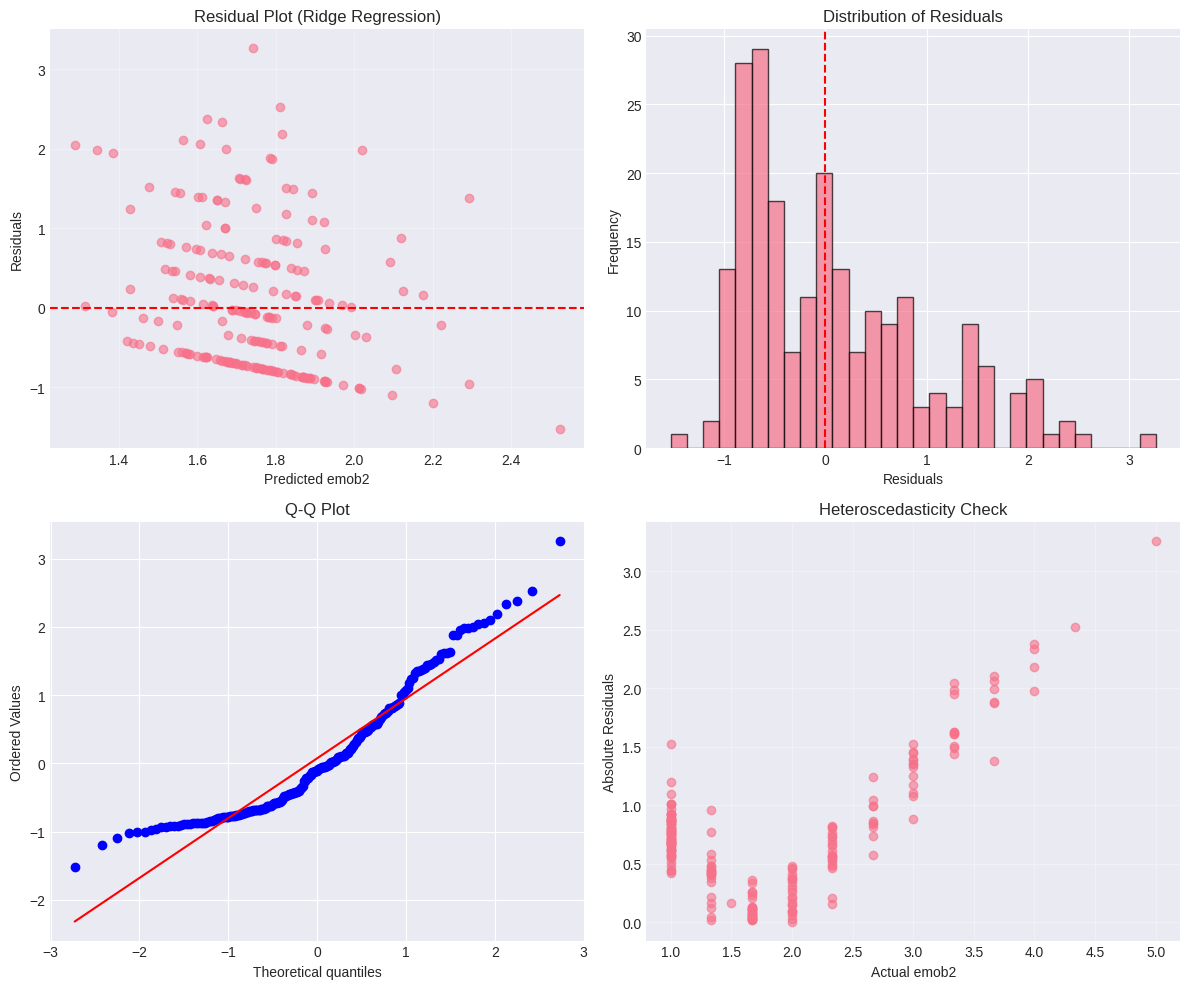

Mean Residual: 0.0748
Std Residual: 0.9055
Min/Max Residual: -1.5230 / 3.2593


In [29]:
best_model_name = max(results.keys(), key=lambda k: results[k]['test_r2'])
best_predictions = results[best_model_name]['y_pred_test']

# Calculate residuals
residuals = y_test - best_predictions

# Create error analysis plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residual plot
axes[0, 0].scatter(best_predictions, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted emob2')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title(f'Residual Plot ({best_model_name})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Residual distribution
axes[0, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Residuals')

# 3. Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')

# 4. Actual vs Residual
axes[1, 1].scatter(y_test, np.abs(residuals), alpha=0.6)
axes[1, 1].set_xlabel('Actual emob2')
axes[1, 1].set_ylabel('Absolute Residuals')
axes[1, 1].set_title('Heteroscedasticity Check')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Error statistics
print(f"Mean Residual: {np.mean(residuals):.4f}")
print(f"Std Residual: {np.std(residuals):.4f}")
print(f"Min/Max Residual: {np.min(residuals):.4f} / {np.max(residuals):.4f}")


In [30]:
# Create meaningful emotion categories based on distribution
y_categories = pd.cut(y_test,
                      bins=[0, 1.1, 1.7, 2.5, 5.1],
                      labels=['minimal', 'low', 'moderate', 'high'])

print("Distribution of emotion categories:")
print(y_categories.value_counts())

# This would likely work much better than regression

Distribution of emotion categories:
minimal     77
low         53
moderate    43
high        45
Name: count, dtype: int64


Classification Report:
              precision    recall  f1-score   support

        high       0.17      0.04      0.07        45
         low       0.12      0.06      0.08        53
     minimal       0.31      0.68      0.42        77
    moderate       0.07      0.02      0.04        43

    accuracy                           0.27       218
   macro avg       0.17      0.20      0.15       218
weighted avg       0.19      0.27      0.19       218



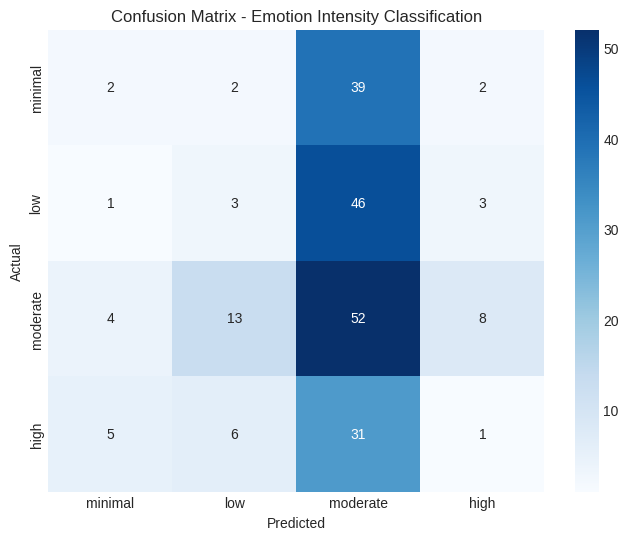


Top 10 Features for Classification:
                feature  importance
11      avg_word_length    0.076588
2          prob_neutral    0.073530
0         prob_positive    0.073518
1         prob_negative    0.073394
4     sentiment_entropy    0.071223
3            confidence    0.070121
20       all_caps_ratio    0.069620
8            char_count    0.067179
19    capitalized_ratio    0.054708
12  avg_sentence_length    0.053132


In [31]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Create categories for training data
y_train_cat = pd.cut(y_train,
                     bins=[0, 1.1, 1.7, 2.5, 5.1],
                     labels=['minimal', 'low', 'moderate', 'high'])

y_test_cat = pd.cut(y_test,
                    bins=[0, 1.1, 1.7, 2.5, 5.1],
                    labels=['minimal', 'low', 'moderate', 'high'])

# Train classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train_scaled, y_train_cat)

# Predict
y_pred_cat = clf.predict(X_test_scaled)

# Evaluate
print("Classification Report:")
print(classification_report(y_test_cat, y_pred_cat))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_cat, y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['minimal', 'low', 'moderate', 'high'],
            yticklabels=['minimal', 'low', 'moderate', 'high'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Emotion Intensity Classification')
plt.show()

# Feature importance for classification
feat_imp = pd.DataFrame({
    'feature': feature_cols,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

print("\nTop 10 Features for Classification:")
print(feat_imp)

In [32]:
# Just detect: High emotion (emob2 >= 3) vs Low emotion
y_binary = (y_test >= 3.0).astype(int)
print(f"Binary distribution: {np.bincount(y_binary)}")

Binary distribution: [183  35]



Weighted Approach:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       183
           1       0.00      0.00      0.00        35

    accuracy                           0.83       218
   macro avg       0.42      0.49      0.45       218
weighted avg       0.70      0.83      0.76       218

ROC-AUC: 0.575

SMOTE Approach:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       183
           1       0.09      0.03      0.04        35

    accuracy                           0.80       218
   macro avg       0.46      0.49      0.47       218
weighted avg       0.72      0.80      0.75       218

ROC-AUC: 0.506


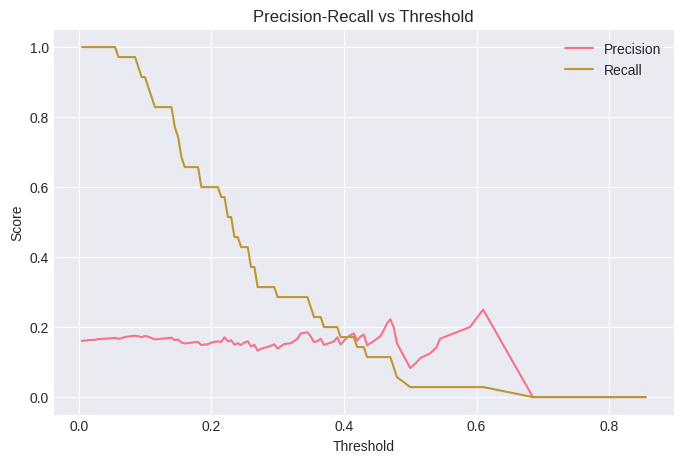

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE

# Create binary target
y_train_binary = (y_train >= 3.0).astype(int)
y_test_binary = (y_test >= 3.0).astype(int)

# Option 1: Class weights
clf_weighted = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # Heavily weight the minority class
)
clf_weighted.fit(X_train_scaled, y_train_binary)

# Option 2: SMOTE (Synthetic Minority Over-sampling)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_binary)
clf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
clf_smote.fit(X_train_balanced, y_train_balanced)

# Evaluate both
for name, clf in [('Weighted', clf_weighted), ('SMOTE', clf_smote)]:
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    print(f"\n{name} Approach:")
    print(classification_report(y_test_binary, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test_binary, y_pred_proba):.3f}")

# Focus on probability threshold tuning
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()